In [37]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
sns.set()
import os
import string
import re
from sklearn import decomposition
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [76]:
curr_dir= os.getcwd()
demographics = pd.read_csv(curr_dir+"//train/demographics.csv")
event_calendar = pd.read_csv(curr_dir+"//train/event_calendar.csv")
historical_volume = pd.read_csv(curr_dir+"//train/historical_volume.csv")
industry_soda_sales = pd.read_csv(curr_dir+"//train/industry_soda_sales.csv")
industry_volume = pd.read_csv(curr_dir+"//train/industry_volume.csv")
price_sales_promotion = pd.read_csv(curr_dir+"//train/price_sales_promotion.csv")
weather = pd.read_csv(curr_dir+"//train/weather.csv")

In [77]:
historical_volume.head()

,Agency,SKU,YearMonth,Volume
0,Agency_22,SKU_01,201301,52.2720
1,Agency_22,SKU_02,201301,110.7000
2,Agency_58,SKU_23,201301,0.0000
3,Agency_48,SKU_07,201301,28.3200
4,Agency_22,SKU_05,201301,238.5387


In [5]:
event_calendar.head()

,YearMonth,Easter Day,Good Friday,New Year,Christmas,Labor Day,Independence Day,Revolution Day Memorial,Regional Games,FIFA U-17 World Cup,Football Gold Cup,Beer Capital,Music Fest
0,201301,0,0,1,0,0,0,0,0,0,0,0,0
1,201302,0,0,0,0,0,0,0,0,0,0,0,0
2,201303,1,1,0,0,0,0,0,0,0,0,0,1
3,201304,0,0,0,0,0,0,0,0,0,0,0,0
4,201305,0,0,0,0,1,0,0,0,0,0,0,0


In [6]:
event_calendar['no_of_holidays'] = event_calendar.iloc[:,1:].sum(axis=1)

In [7]:
industry_soda_sales.head()

,YearMonth,Soda_Volume
0,201301,718394219
1,201302,753938444
2,201303,892192092
3,201304,838099501
4,201305,864420003


In [8]:
industry_volume.head()

,YearMonth,Industry_Volume
0,201301,492612703
1,201302,431937346
2,201303,509281531
3,201304,532390389
4,201305,551755254


In [9]:
ab= pd.merge(industry_soda_sales,industry_volume, on='YearMonth' )

In [10]:
ab.head()

,YearMonth,Soda_Volume,Industry_Volume
0,201301,718394219,492612703
1,201302,753938444,431937346
2,201303,892192092,509281531
3,201304,838099501,532390389
4,201305,864420003,551755254


In [11]:
common= pd.merge(ab,event_calendar[['YearMonth','no_of_holidays']],on = 'YearMonth')

In [12]:
common.head()

,YearMonth,Soda_Volume,Industry_Volume,no_of_holidays
0,201301,718394219,492612703,1
1,201302,753938444,431937346,0
2,201303,892192092,509281531,3
3,201304,838099501,532390389,0
4,201305,864420003,551755254,1


In [13]:
common.shape

(60, 4)

In [14]:
weather.head()

,YearMonth,Agency,Avg_Max_Temp
0,201301,Agency_01,17.072
1,201302,Agency_01,19.984
2,201303,Agency_01,24.600
3,201304,Agency_01,27.532
4,201305,Agency_01,29.396


In [15]:
weather.shape

(3600, 3)

In [16]:
common.index = common['YearMonth']

In [17]:
yearmonth = np.array(common.index)

In [18]:
yearmonth[0:12]

array([201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308,
       201309, 201310, 201311, 201312], dtype=int64)

In [19]:
common.drop(['YearMonth'],axis=1,inplace =True)

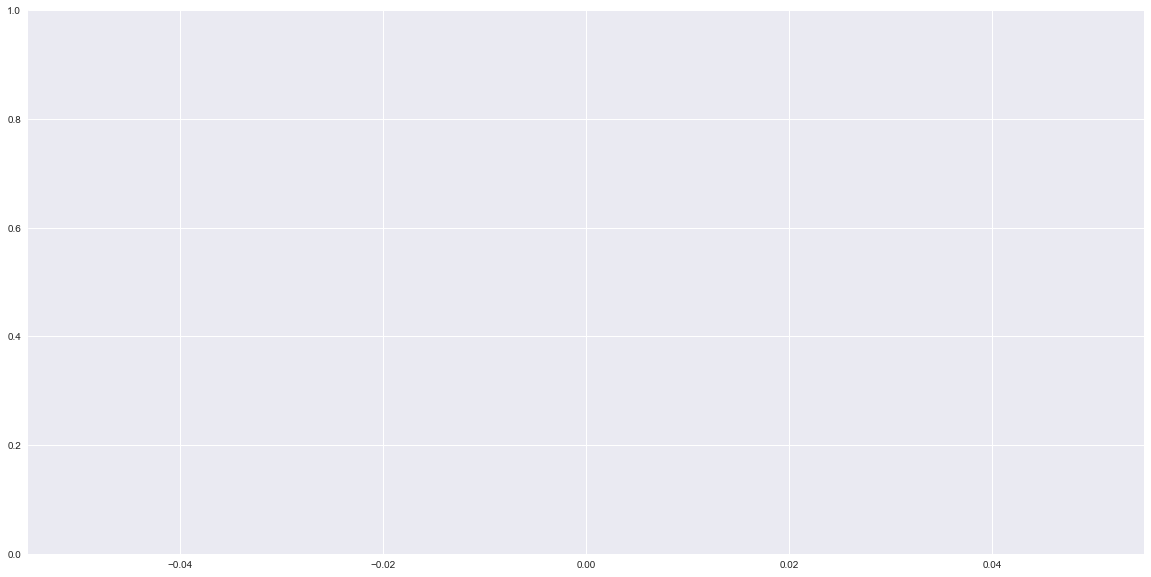

In [38]:
plt.rcParams['figure.figsize']=(20,10)
plt.locator_params(axis='x',nticks=20)

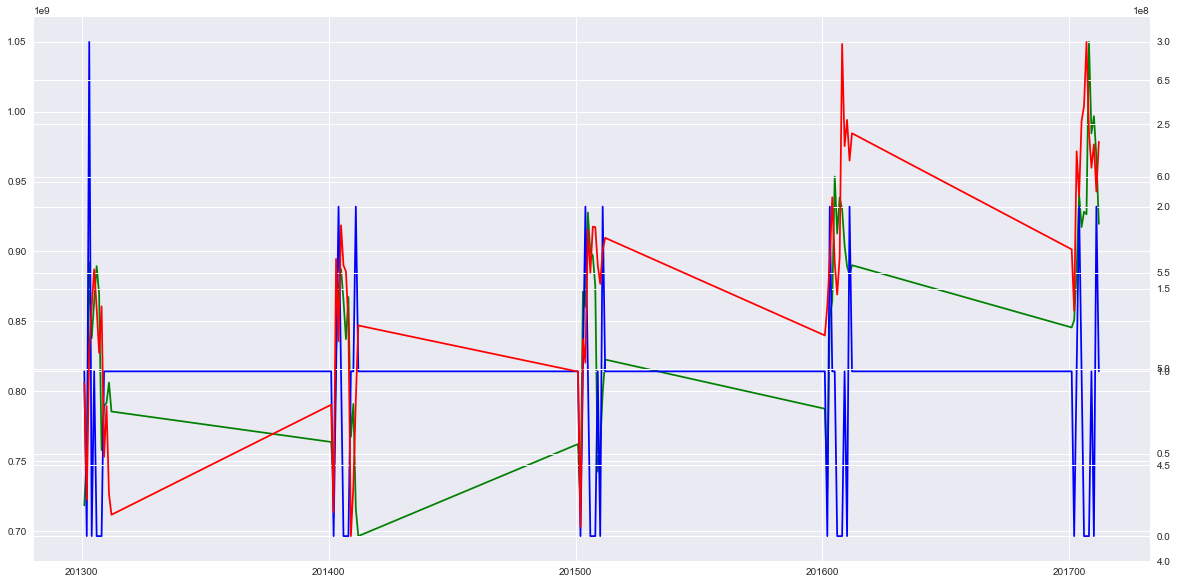

In [39]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax1.plot(common.index,common.Soda_Volume,'g-',)
ax2.plot(common.index,common.no_of_holidays,'b-')
ax3.plot(common.index,common.Industry_Volume,'r-')
#plt.plot(common.no_of_holidays, secondary_y =True)
#start,end = plt.xlim()
#plt.set_xticks(yearmonth[0:12])
#print(start,end)
#plt.xticklabels(yearmonth,rotation=90)
plt.show()


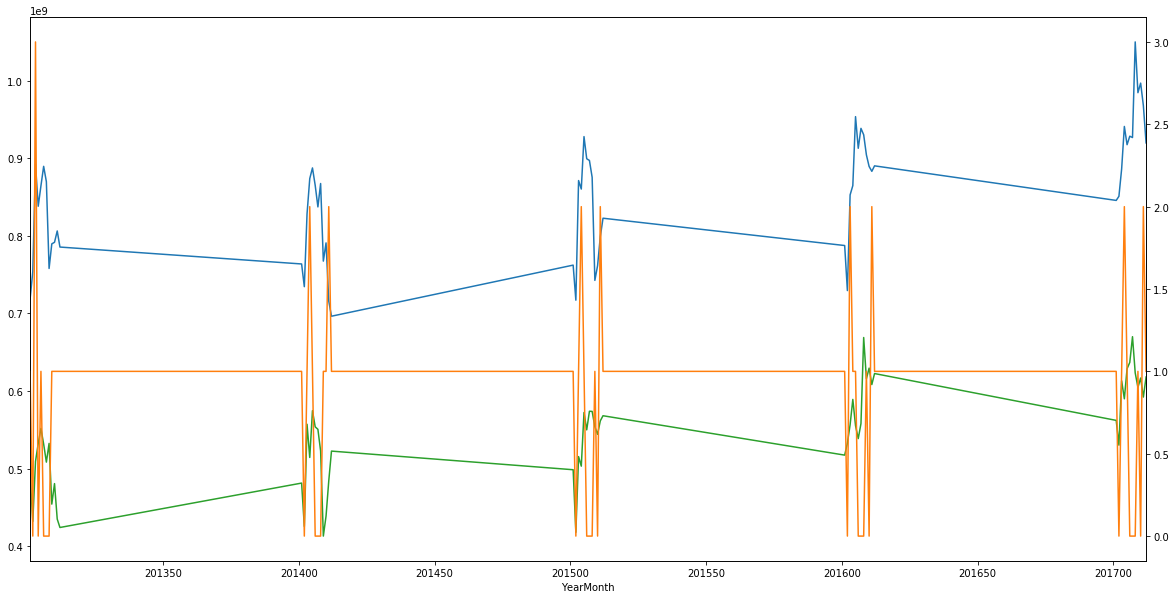

In [108]:
common.Soda_Volume.plot(figsize=(20,10))
common.no_of_holidays.plot(secondary_y= True)
common.Industry_Volume.plot()

In [95]:
vol_test = pd.read_csv(curr_dir+"//test/volume_forecast.csv")

In [96]:
vol_test1 = pd.read_csv(curr_dir+"//test/volume_forecast.csv")

In [115]:
historical_volume = pd.get_dummies(historical_volume, columns=["SKU"])
historical_volume= pd.get_dummies(historical_volume, columns=["Agency"])

In [116]:
vol_test = pd.get_dummies(vol_test, columns=["SKU"])
vol_test = pd.get_dummies(vol_test, columns=["Agency"])

In [97]:
vol_test.drop(['Volume'],axis=1,inplace = True)

In [117]:
vol_test.head()

,SKU_01,SKU_02,SKU_03,SKU_04,SKU_05,SKU_06,SKU_07,SKU_08,SKU_11,SKU_12,...,Agency_51,Agency_52,Agency_53,Agency_54,Agency_55,Agency_56,Agency_57,Agency_58,Agency_59,Agency_60
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
x_train,y_train = historical_volume.drop(['Volume','YearMonth'],axis =1),historical_volume.Volume

In [121]:
m = RandomForestRegressor(n_jobs=-1,min_samples_leaf=3,n_estimators=200)

In [122]:
m.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [123]:
print(m.score(x_train,y_train))

0.940851945788


In [124]:
preds = m.predict(vol_test)

In [125]:
pr = pd.Series(preds)

In [126]:
submit = pd.concat([vol_test1,pr],axis =1)

In [128]:
submit.drop(['Volume'],inplace= True,axis=1)

In [129]:
submit.head()

,Agency,SKU,0
0,Agency_23,SKU_06,11.973606
1,Agency_34,SKU_20,3.099362
2,Agency_24,SKU_02,119.267959
3,Agency_40,SKU_06,11.973606
4,Agency_42,SKU_32,1.783704


In [130]:
submit.columns = ['Agency','SKU','Volume']

In [134]:
submit.to_csv(curr_dir+"\\volume_forecast.csv",index=False)

In [91]:
def cat_split(row):
    try:
        text = row
        txt1, txt2 = text.split('_')
        return txt2
    except:
        return np.nan

historical_volume['Agency'] = historical_volume.Agency.apply(lambda val: cat_split(val))
historical_volume['SKU'] = historical_volume.SKU.apply(lambda val: cat_split(val))

In [118]:
historical_volume.head()

,YearMonth,Volume,SKU_01,SKU_02,SKU_03,SKU_04,SKU_05,SKU_06,SKU_07,SKU_08,...,Agency_51,Agency_52,Agency_53,Agency_54,Agency_55,Agency_56,Agency_57,Agency_58,Agency_59,Agency_60
0,201301,52.2720,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,201301,110.7000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,201301,0.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,201301,28.3200,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,201301,238.5387,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
def cat_split(row):
    try:
        text = row
        txt1, txt2 = text.split('_')
        return txt2
    except:
        return np.nan

vol_test['Agency'] = vol_test.Agency.apply(lambda val: cat_split(val))
vol_test['SKU'] = vol_test.SKU.apply(lambda val: cat_split(val))

In [119]:
vol_test.head()

,SKU_01,SKU_02,SKU_03,SKU_04,SKU_05,SKU_06,SKU_07,SKU_08,SKU_11,SKU_12,...,Agency_51,Agency_52,Agency_53,Agency_54,Agency_55,Agency_56,Agency_57,Agency_58,Agency_59,Agency_60
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
